# Artificial Neural Network Working for Fashion MNIST Classification Prediction of 10 product Categories

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

## Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip 

> pip install --upgrade tensorflow==2.0.0-rc1

In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from tensorflow.keras.layers import BatchNormalization

In [3]:
keras.__version__

'2.8.0'

In [4]:
tf.__version__


'2.8.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
# selecting the first sample
x = X_train[10]
print("The dimension of x is 2D matrix as ", x.shape)
# Resizing the image
x = cv2.resize(x, (18,18))

The dimension of x is 2D matrix as  (28, 28)


In [12]:
print("The range of pixel varies between 0 to 255")
print("The pixel having black is more close to 0 and pixel which is white is more close to 255")
print(x)

The range of pixel varies between 0 to 255
The pixel having black is more close to 0 and pixel which is white is more close to 255
[[  0   0   0   0  55 165 164  59  44  39  56  86 187  97   9   0   0   0]
 [  0   0   0  52 177 186 192 212 196 157 204 189 192 184 143   0   0   0]
 [  0   0   0 137 155 173 175 183 182 183 185 183 180 167 169  32   0   0]
 [  0   0   1 164 146 168 180 184 182 178 185 191 189 175 171  60   0   0]
 [  0   0  18 166 147 137 171 175 178 175 173 182 176 157 162  74   0   0]
 [  0   0  31 142 190 126 144 160 160 156 155 169 142 195 155 103   0   0]
 [  0   0  15  78 153 144 157 155 158 159 160 179 169 128 169  53   0   0]
 [  0   0   0   0   0  80 169 154 158 162 164 166 192   0   0   0   0   0]
 [  0   0   0   1   1  36 162 159 160 161 164 163 200   0   1   0   0   0]
 [  0   0   0   0   2  45 157 163 162 162 164 167 162   4   2   0   0   0]
 [  0   0   0   0   2 108 161 165 165 161 169 163 169  23   4   0   0   0]
 [  0   0   0   1   1 158 164 170 170 163 17

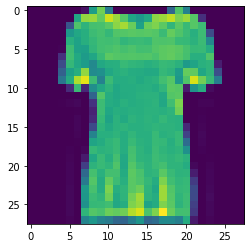

In [14]:
plt.imshow(X_train[10])

In [15]:
y_train[10]

0

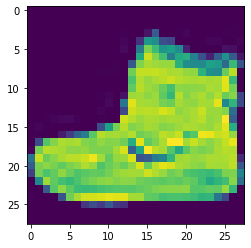

In [16]:
plt.imshow(X_train[0])

In [17]:
y_train[0]

9

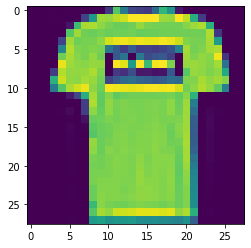

In [18]:
plt.imshow(X_train[1])

In [19]:
y_train[1]

0

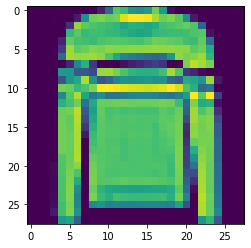

In [20]:
plt.imshow(X_train[5])

In [21]:
y_train[5]

2

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
class_names[y_train[10]]

'T-shirt/top'

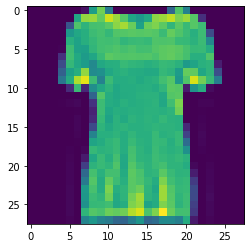

In [24]:
plt.imshow(X_train[10])

#### X_train_full[10] is giving information abour the 28*28 pixel of image present at index 10 in x_train_full data. where in result we will find the pixel value in first row (28 pixel), 2nd row (28 pixel) upto 28 row (28 pixel). pixel value 0 indicate pixel is black and 255 indicate pixel is white

In [25]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

#### Here we have normalize the data by dividing 255. ( float value bcoz to make compatible with python version) bcoz here we know pixel value is in between 0 & 255. so use this method of division by 255. But when we dont he lmit of data range hen we will standardization method for data normalization where we wiil find and standard deviation for the process

In [26]:
X_train_n = X_train/ 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [27]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [28]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](1.png)

![](Functional.JPG "Title")

# np.random.seed(42)
tf.random.set_seed(42)
 by using random.seed everytime we run the code we will get same set of training and test distribution so that we will get same result display everytime we run the code

In [29]:
np.random.seed(42)
#tf.random.set_random_seed(42)
tf.random.set_seed(42)
#tf.random.set_seed(42)

![](Structure.jpg "Title")

# MODEL DESIGNING

### Keras is high end library used for designing model such as number of layer , number of neuron per layer, loss function, optimizer , activation function , evaluation metrics etc

### Tensorflow, Theano and CNTK is lower level libray which is completely responible for high level  mathematical operations.Tensorflow, Theano and CNTK work under keras library very efficiently for smooth oprrations 

# 1. Create Model

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax"))

# model summary will give infoarmation about Trainable and non trainable parameters per layers.

Trainnable parameters are Weight and Biases.

Ex: Flatten layer is having 784 input.
    Next layer is Dense layer having 300 neuron. So in this layer total number of Trainable parameters are
    
    784 *300 +300=235500 (784 are input features and 300 are nueron so weight is associated with each input feauture 784*300) 
    
    Hence total number of weights = 784*300
    Total number of biases =300 ( one bias per nueron)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


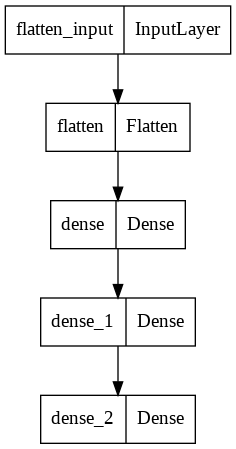

In [32]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [33]:
weights, biases = model.layers[1].get_weights()

In [34]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

Documentation - https://keras.io/models/sequential/

# 2. Compile Model

# Model Compile is used to set up Learning Process such as Loss function, optimizer and metrics



Here loss is used as Sparse-Catgorical_crossentropy bcoz output y in form of labels. If output y is in form probabilities then used only categorical_crossentropy

If output y is in binary 0 0r 1 or yes yes or no then use loss as binary_crossentropy

optimizer tells keras that perform back propogation

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 3. Fit Model/Training Model

In [39]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

In [40]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [41]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8456545472145081,
  0.8563636541366577,
  0.8616363406181335,
  0.8677818179130554,
  0.8715272545814514,
  0.8752181529998779,
  0.8791999816894531,
  0.8822181820869446,
  0.8838000297546387,
  0.8866727352142334,
  0.8893818259239197,
  0.8915091156959534,
  0.8938363790512085,
  0.8969636559486389,
  0.8981454372406006,
  0.9000727534294128,
  0.902472734451294,
  0.9037272930145264,
  0.9059090614318848,
  0.9075272679328918,
  0.9083636403083801,
  0.9100000262260437,
  0.9124181866645813,
  0.9137272834777832,
  0.9154909253120422,
  0.9166363477706909,
  0.9188545346260071,
  0.9198727011680603],
 'loss': [0.7237029075622559,
  0.484192818403244,
  0.43905338644981384,
  0.41231462359428406,
  0.3939222991466522,
  0.3750678300857544,
  0.3630312979221344,
  0.35152509808540344,
  0.3412765860557556,
  0.3317754566669464,
  0.3238329291343689,
  0.3146835267543793,
  0.30778029561042786,
  0.30192798376083374,
  0.29439

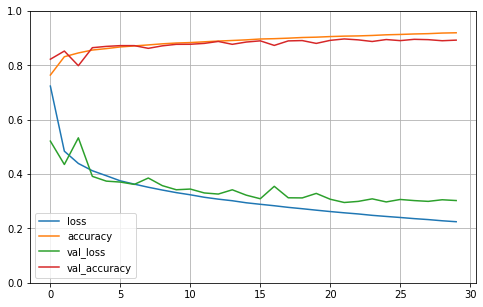

In [42]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4. Evaluate Model

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

# 5. Prediction

In [44]:
X_new = X_test[:3]

In [45]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [48]:
y_pred = model.predict(X_new)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [49]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

AxesImage(54,36;334.8x217.44)


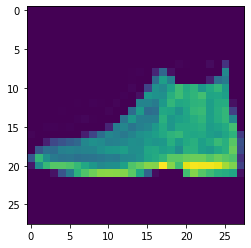

In [50]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


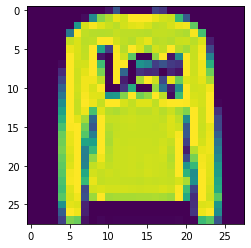

In [51]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


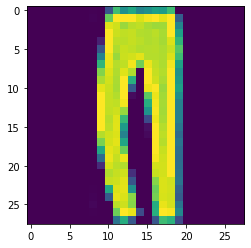

In [52]:
print(plt.imshow(X_test[2]))

# Batch Normalisation and Dropout

In [60]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [62]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6597 - accuracy: 0.7657 - val_loss: 0.4139 - val_accuracy: 0.8544
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4961 - accuracy: 0.8207 - val_loss: 0.3773 - val_accuracy: 0.8656
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4550 - accuracy: 0.8355 - val_loss: 0.3897 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4282 - accuracy: 0.8447 - val_loss: 0.3512 - val_accuracy: 0.8754
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4098 - accuracy: 0.8506 - val_loss: 0.3489 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3965 - accuracy: 0.8545 - val_loss: 0.3330 - val_accuracy: 0.8804
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3839 - accuracy: 0.8609 - val_loss: 0.3290 - val_accuracy

In [63]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [64]:
model_history.history

{'accuracy': [0.7656909227371216,
  0.8207091093063354,
  0.8355454802513123,
  0.8447090983390808,
  0.8505818247795105,
  0.8545272946357727,
  0.860945463180542,
  0.8643817901611328,
  0.8651636242866516,
  0.8708727359771729,
  0.8690363764762878,
  0.8727818131446838,
  0.8726545572280884,
  0.8748000264167786,
  0.8765272498130798,
  0.8781636357307434,
  0.8797272443771362,
  0.8810727000236511,
  0.8828545212745667,
  0.8853636384010315,
  0.8849272727966309,
  0.8852182030677795,
  0.8852909207344055,
  0.8891454339027405,
  0.8878909349441528,
  0.8907636404037476,
  0.8893636465072632,
  0.8912727236747742,
  0.8923272490501404,
  0.8927817940711975],
 'loss': [0.6596782803535461,
  0.4961402714252472,
  0.45504090189933777,
  0.42819082736968994,
  0.4098037779331207,
  0.3965199291706085,
  0.3839183449745178,
  0.3728318512439728,
  0.369479238986969,
  0.35951516032218933,
  0.35647425055503845,
  0.3473069369792938,
  0.34524253010749817,
  0.33815065026283264,
  0.335

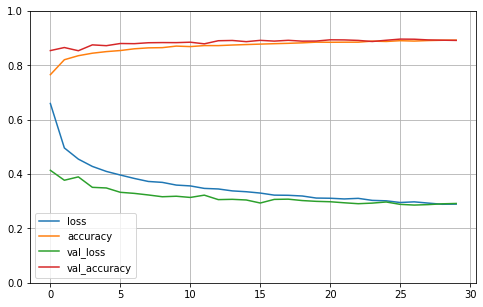

In [65]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [66]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8843


[0.3235678970813751, 0.8842999935150146]

In [67]:
X_new = X_test[:3]

In [68]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [69]:
y_pred = model.predict(X_new)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [70]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')